# Import Library

In [1]:
pip install ipywidgets

In [2]:
from google.colab import drive

import datetime
import calendar
import collections

import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import seaborn as sns
import plotly.graph_objects as go

import networkx as nx
import community as community_louvain
from operator import itemgetter

import folium
from folium import plugins

import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Custom Colors
GREEN = "#239B56"
BLUE = "#5DADE2"
YELLOW = "#eab544"
MAGENTA = "#6C3483"
RED = "#FF0000"
GREY = "#696969"

# Read and Preprocessed CSV

In [3]:
# https://drive.google.com/file/d/1XDW6IJcOulrAqOIHmol4gzqgA2AtS8Um/view?usp=share_link

# Need to wait approximately 2 minutes, because of the size

dataset_id = '1XDW6IJcOulrAqOIHmol4gzqgA2AtS8Um'

dataset_csv = f'https://drive.google.com/uc?id={dataset_id}&export=download&confirm=t'

df = pd.read_csv(dataset_csv)
df.head()

departure               return departure_id    departure_name  \
0  2020-03-23 06:09:44  2020-03-23 06:16:26           86          Kuusitie   
1  2020-03-23 06:11:58  2020-03-23 06:26:31           26        Kamppi (M)   
2  2020-03-23 06:16:29  2020-03-23 06:24:23          268  Porolahden koulu   
3  2020-03-23 06:33:53  2020-03-23 07:14:03          751        Vallipolku   
4  2020-03-23 06:36:09  2020-03-23 07:04:10           62  Länsisatamankatu   

  return_id       return_name  distance (m)  duration (sec.)  \
0     111.0     Esterinportti        1747.0            401.0   
1      10.0       Kasarmitori        1447.0            869.0   
2     254.0       Agnetankuja        1772.0            469.0   
3     106.0   Korppaanmäentie        7456.0           2406.0   
4     121.0  Vilhonvuorenkatu        7120.0           1679.0   

   avg_speed (km/h)  departure_latitude  departure_longitude  return_latitude  \
0          0.261397           60.195245            24.901900        60.197572   
1          0.099908           60.168610            24.930537        60.165017   
2          0.226695           60.195540            25.053581        60.187234   
3          0.185935           60.227827            24.819614        60.203474   
4          0.254437           60.158928            24.909692        60.186463   

   return_longitude  Air temperature (degC)  
0         24.926781                     0.9  
1         24.949473                     0.9  
2         25.036412                     0.9  
3         24.898930                     0.9  
4         24.967872                     0.9

In [4]:
df.tail()

departure               return departure_id  \
12157453  2017-10-30 23:43:00  2017-10-30 23:55:00         64.0   
12157454  2017-10-30 23:49:00  2017-10-31 04:49:00        117.0   
12157455  2017-10-30 23:52:00  2017-10-31 00:02:00        142.0   
12157456  2017-10-30 23:57:00  2017-10-31 00:00:00         28.0   
12157457  2017-10-30 23:59:00  2017-10-31 00:12:00         20.0   

             departure_name return_id      return_name  distance (m)  \
12157453    Tyynenmerenkatu      64.0  Tyynenmerenkatu         918.0   
12157454   Brahen puistikko      44.0    Sörnäinen (M)         822.0   
12157455        Koskelantie     141.0       Intiankatu        1817.0   
12157456        Lastenlehto      26.0       Kamppi (M)         416.0   
12157457  Kaisaniemenpuisto     114.0     Ratapihantie        2856.0   

          duration (sec.)  avg_speed (km/h)  departure_latitude  \
12157453            714.0          0.077143           60.156838   
12157454            252.0          0.195714           60.189671   
12157455            594.0          0.183535           60.208749   
12157456            152.0          0.164211           60.165812   
12157457            771.0          0.222257           60.173199   

          departure_longitude  return_latitude  return_longitude  \
12157453            24.920661        60.156838         24.920661   
12157454            24.948102        60.187736         24.960980   
12157455            24.946514        60.207858         24.967638   
12157456            24.927021        60.168610         24.930537   
12157457            24.943301        60.196431         24.936256   

          Air temperature (degC)  
12157453                     0.4  
12157454                     0.4  
12157455                     0.4  
12157456                     0.4  
12157457                     0.4

In [5]:
df.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [6]:
df.dtypes

departure                  object
return                     object
departure_id               object
departure_name             object
return_id                  object
return_name                object
distance (m)              float64
duration (sec.)           float64
avg_speed (km/h)          float64
departure_latitude        float64
departure_longitude       float64
return_latitude           float64
return_longitude          float64
Air temperature (degC)    float64
dtype: object

In [7]:
len(df)

12157458

In [8]:
# Convert the 'date_column' from object to datetime
df['departure'] = pd.to_datetime(df['departure'])
df['return'] = pd.to_datetime(df['return'])

In [9]:
df.columns

Index(['departure', 'return', 'departure_id', 'departure_name', 'return_id',
       'return_name', 'distance (m)', 'duration (sec.)', 'avg_speed (km/h)',
       'departure_latitude', 'departure_longitude', 'return_latitude',
       'return_longitude', 'Air temperature (degC)'],
      dtype='object')

In [10]:
# Rename the 'old_column_name' to 'new_column_name'
df.rename(columns={'distance (m)': 'distance'}, inplace=True)
df.rename(columns={'duration (sec.)': 'duration'}, inplace=True)
df.rename(columns={'avg_speed (km/h)': 'avg_speed'}, inplace=True)
df.rename(columns={'Air temperature (degC)': 'temperature'}, inplace=True)

In [11]:
df.dtypes

departure              datetime64[ns]
return                 datetime64[ns]
departure_id                   object
departure_name                 object
return_id                      object
return_name                    object
distance                      float64
duration                      float64
avg_speed                     float64
departure_latitude            float64
departure_longitude           float64
return_latitude               float64
return_longitude              float64
temperature                   float64
dtype: object

In [12]:
df_more_than_30_minutes = df[df["duration"]>1800]
df_more_than_30_minutes

departure              return departure_id  \
3        2020-03-23 06:33:53 2020-03-23 07:14:03          751   
45       2020-03-23 07:32:06 2020-03-24 12:03:36           37   
52       2020-03-23 07:37:12 2020-03-23 08:10:22          262   
80       2020-03-23 07:58:56 2020-03-23 08:40:08           39   
123      2020-03-23 08:22:20 2020-03-23 09:50:08           19   
...                      ...                 ...          ...   
12157084 2017-10-30 19:44:00 2017-10-30 22:01:00         42.0   
12157224 2017-10-30 20:32:00 2017-10-31 07:32:00         45.0   
12157277 2017-10-30 20:51:00 2017-10-30 22:25:00         69.0   
12157414 2017-10-30 22:34:00 2017-10-31 06:53:00        123.0   
12157446 2017-10-30 23:34:00 2017-10-31 00:04:00         28.0   

               departure_name return_id            return_name  distance  \
3                  Vallipolku     106.0        Korppaanmäentie    7456.0   
45                 Töölönkatu      83.0     Meilahden sairaala      69.0   
52               Siilitie (M)     134.0        Haukilahdenkatu    7775.0   
80                    Ooppera     116.0             Linnanmäki    2987.0   
123       Rautatientori / itä      26.0             Kamppi (M)    1065.0   
...                       ...       ...                    ...       ...   
12157084      Haapaniemenkatu     122.0        Lintulahdenkatu   18935.0   
12157224        Brahen kenttä      22.0  Rautatientori / länsi    2264.0   
12157277          Kalevankatu      30.0           Itämerentori    1082.0   
12157414           Näkinsilta      43.0            Karhupuisto     665.0   
12157446          Lastenlehto      28.0            Lastenlehto    2758.0   

           duration     avg_speed  departure_latitude  departure_longitude  \
3            2406.0  1.859352e-01           60.227827            24.819614   
45        5012669.0  8.259073e-07           60.177560            24.928327   
52           1986.0  2.348943e-01           60.205962            25.045161   
80           2468.0  7.261750e-02           60.182553            24.926687   
123          5261.0  1.214598e-02           60.170824            24.942527   
...             ...           ...                 ...                  ...   
12157084     8188.0  1.387518e-01           60.183160            24.955195   
12157224    39610.0  3.429437e-03           60.186862            24.950917   
12157277     5637.0  1.151676e-02           60.165680            24.931422   
12157414    29923.0  1.333422e-03           60.179765            24.955462   
12157446     1836.0  9.013072e-02           60.165812            24.927021   

          return_latitude  return_longitude  temperature  
3               60.203474         24.898930          0.9  
45              60.190219         24.908335          1.1  
52              60.198531         24.967671          1.1  
80              60.191141         24.940159          1.1  
123             60.168610         24.930537          1.5  
...                   ...               ...          ...  
12157084        60.183718         24.962194          1.3  
12157224        60.170606         24.939760          1.2  
12157277        60.163531         24.914517          1.2  
12157414        60.184283         24.952676          0.4  
12157446        60.165812         24.927021          0.4  

[434677 rows x 14 columns]

In [13]:
# Delete the DataFrame to free up memory
del df_more_than_30_minutes

In [14]:
all_df = df.copy()

There are 434.677 rides that is considered more than 30 minutes, because we want to find the most optimal (shortest) path from a single bike station to the other bike station in less than or equal to 30 minutes, then we would like to exclude this 434.677 data from the dataset

# EDA

In [15]:
all_df.describe()

distance      duration     avg_speed  departure_latitude  \
count  1.215746e+07  1.215746e+07  1.215391e+07        1.215746e+07   
mean   2.295275e+03  9.597751e+02  3.355556e-01        6.017981e+01   
std    2.452067e+04  7.346528e+03  3.428006e+01        1.733003e-02   
min   -4.292467e+06  0.000000e+00 -4.689001e+02        6.014792e+01   
25%    1.000000e+03  3.440000e+02  1.467403e-01        6.016723e+01   
50%    1.739000e+03  5.860000e+02  1.863679e-01        6.017608e+01   
75%    2.869000e+03  9.710000e+02  2.204348e-01        6.018964e+01   
max    3.681399e+06  5.401659e+06  1.699104e+04        6.023911e+01   

       departure_longitude  return_latitude  return_longitude   temperature  
count         1.215746e+07     1.215746e+07      1.215746e+07  1.214156e+07  
mean          2.492023e+01     6.017971e+01      2.492023e+01  1.565044e+01  
std           5.764062e-02     1.738792e-02      5.783290e-02  5.497952e+00  
min           2.472137e+01     6.014792e+01      2.472137e+01 -5.200000e+00  
25%           2.490969e+01     6.016689e+01      2.490969e+01  1.230000e+01  
50%           2.493407e+01     6.017559e+01      2.493407e+01  1.640000e+01  
75%           2.495029e+01     6.018964e+01      2.495029e+01  1.930000e+01  
max           2.510620e+01     6.023911e+01      2.510620e+01  3.290000e+01

As evident from the above observations, there exist certain irregularities in the data, such as negative and excessively large distances. Addressing these anomalies requires contextual understanding of the data.

**Regarding Distance:**
In the Euclidean space, distances cannot be negative. However, merely filtering for positive values is insufficient. To eliminate unusual cases, trips covering less than 50 meters are considered irregularities within the context of this Exploratory Data Analysis (EDA), as stations are always positioned more than 50 meters apart.

**Concerning Duration:**
Setting appropriate upper and lower limits depends on the specific case. The maximum allowed rental time for a bike is 5 hours, with users exceeding this duration incurring an 80€ penalty. Therefore, the 5-hour mark (18000 seconds) serves as the upper limit for trip duration. The lower limit is straightforward, determined by the previously defined limits: a 50m distance limit at an average speed of 25km/h.

**Regarding Temperature:**
Examining the temperature data, the only anomaly observed is a recorded temperature of 32 degrees in Helsinki. This anomaly is likely attributed to global warming rather than an error in our dataset, as indicated by the table above.

Based on these criteria, the dataset can be refined by excluding records that fall into the anomaly categories. This filtering process involves removing instances with negative or extremely large distances, trips covering less than 50 meters, and durations exceeding the 5-hour limit. Additionally, anomalies in temperature, such as extreme values like 32 degrees, can be excluded to enhance the dataset's accuracy and reliability.

In [16]:
all_dataframe = all_df[(50 < all_df['distance']) & (all_df['distance'] < 10000) & (120 < all_df['duration']) & (all_df['duration'] <  18000)& (-20 < all_df['temperature']) & (all_df['temperature'] < 50)]

all_dataframe.describe()

distance      duration     avg_speed  departure_latitude  \
count  1.127885e+07  1.127885e+07  1.127885e+07        1.127885e+07   
mean   2.242385e+03  7.836003e+02  1.875014e-01        6.017987e+01   
std    1.494708e+03  7.958377e+02  5.429767e-02        1.733170e-02   
min    5.100000e+01  1.210000e+02  1.757611e-04        6.014792e+01   
25%    1.121000e+03  3.800000e+02  1.561384e-01        6.016723e+01   
50%    1.847000e+03  6.150000e+02  1.904464e-01        6.017608e+01   
75%    2.964000e+03  9.910000e+02  2.227817e-01        6.018967e+01   
max    9.999000e+03  1.799800e+04  4.453740e+00        6.023911e+01   

       departure_longitude  return_latitude  return_longitude   temperature  
count         1.127885e+07     1.127885e+07      1.127885e+07  1.127885e+07  
mean          2.492031e+01     6.017976e+01      2.492031e+01  1.563747e+01  
std           5.757454e-02     1.739109e-02      5.777030e-02  5.494620e+00  
min           2.472137e+01     6.014792e+01      2.472137e+01 -5.200000e+00  
25%           2.490969e+01     6.016689e+01      2.490969e+01  1.230000e+01  
50%           2.493327e+01     6.017559e+01      2.493327e+01  1.640000e+01  
75%           2.495029e+01     6.018964e+01      2.495029e+01  1.930000e+01  
max           2.510620e+01     6.023911e+01      2.510620e+01  3.290000e+01

In [17]:
# Delete the DataFrame to free up memory
del all_df

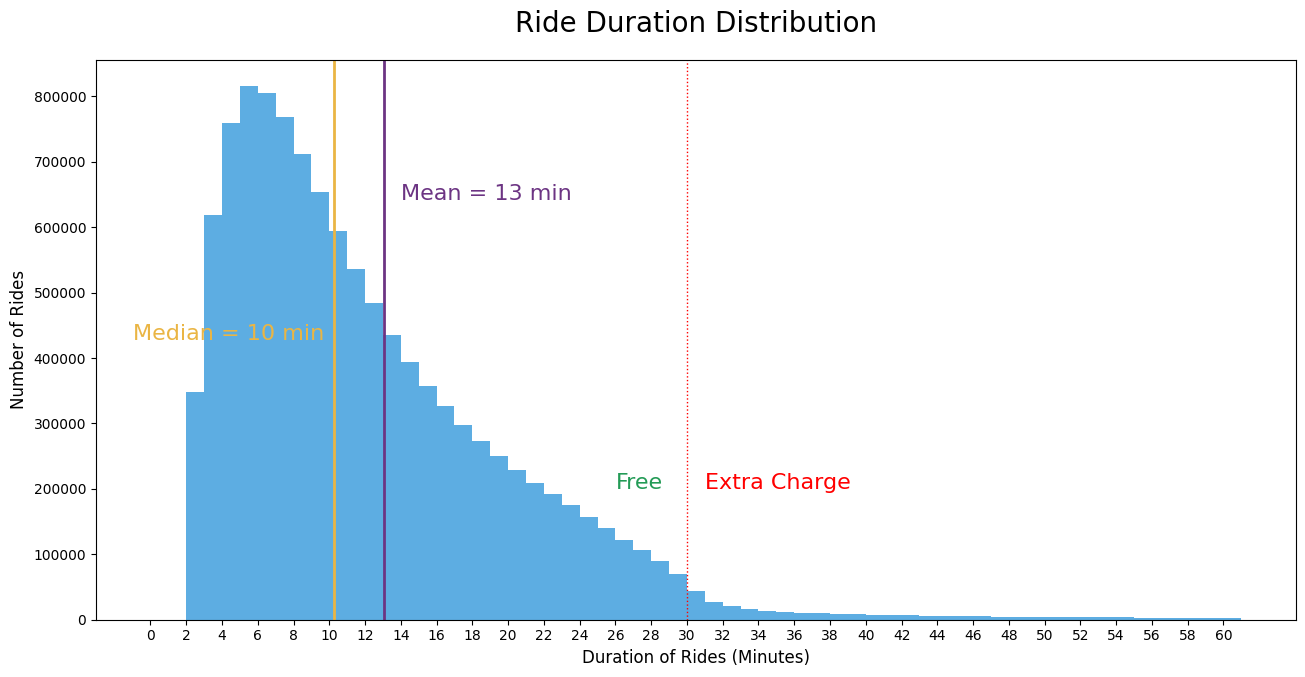

In [18]:
def plot_duration_histogram(dataframe):
  """
  Plot the histogram of time duration of bike usage by each trip according to the reasonable dataframe.
  Parameters
  ----------
  dataframe : dataframe
      Data that has been stored in dataframe pandas format.
  """
  df = dataframe.copy()

  # Converting seconds to minutes
  df["duration"] = df["duration"]/60

  # Filtering relevant data
  duration_data = df["duration"]
  fig = plt.figure(figsize=(15,7))
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

  # Ploting the histogram
  plt.hist(duration_data, bins = range(62), color = BLUE, histtype ="bar")

  # Adding median and mean lines
  plt.axvline(df["duration"].median(), color=YELLOW, linestyle='-', linewidth=2 )
  plt.axvline(df["duration"].mean(), color=MAGENTA, linestyle='-', linewidth=2 )
  plt.axvline(x = 30, color=RED, linestyle=':', linewidth=1 )

  # Adding median and mean texts
  min_ylim, max_ylim = plt.ylim()
  plt.text(-1, max_ylim*0.5, 'Median = {:.0f} min'.format(df["duration"].median()), color = YELLOW, fontsize= 16)
  plt.text(14, max_ylim*0.75, 'Mean = {:.0f} min'.format(df["duration"].mean()), color = MAGENTA,  fontsize= 16)
  plt.text(x= 26,y=200000, s="Free", color = GREEN, fontsize= 16)
  plt.text(x= 31,y=200000, s="Extra Charge", color = RED, fontsize= 16)

  # Seting ticks on x axis
  ticks =range(0, 62, 2)
  plt.xticks(ticks)
  # Seting ticks on y axis
  ticks =range(0, 3600, 2000)

  # Labeling Axes
  ax.set_title('Ride Duration Distribution', fontdict={"fontsize":20}, pad = 20)
  plt.xlabel("Duration of Rides (Minutes)", fontsize= 12, x = 0.5)
  plt.ylabel("Number of Rides", fontsize= 12)
  plt.savefig('Ride Duration Distribution.png')
  plt.show()

plot_duration_histogram(all_dataframe)

As depicted in the above charts, the majority of rides are under 30 minutes. Nevertheless, a small percentage, specifically 3.176% of users, surpassed this limit. Those exceeding the 30-minute but not the 60-minute threshold have cumulatively paid €261,715 since the introduction of city bikes in 2016.

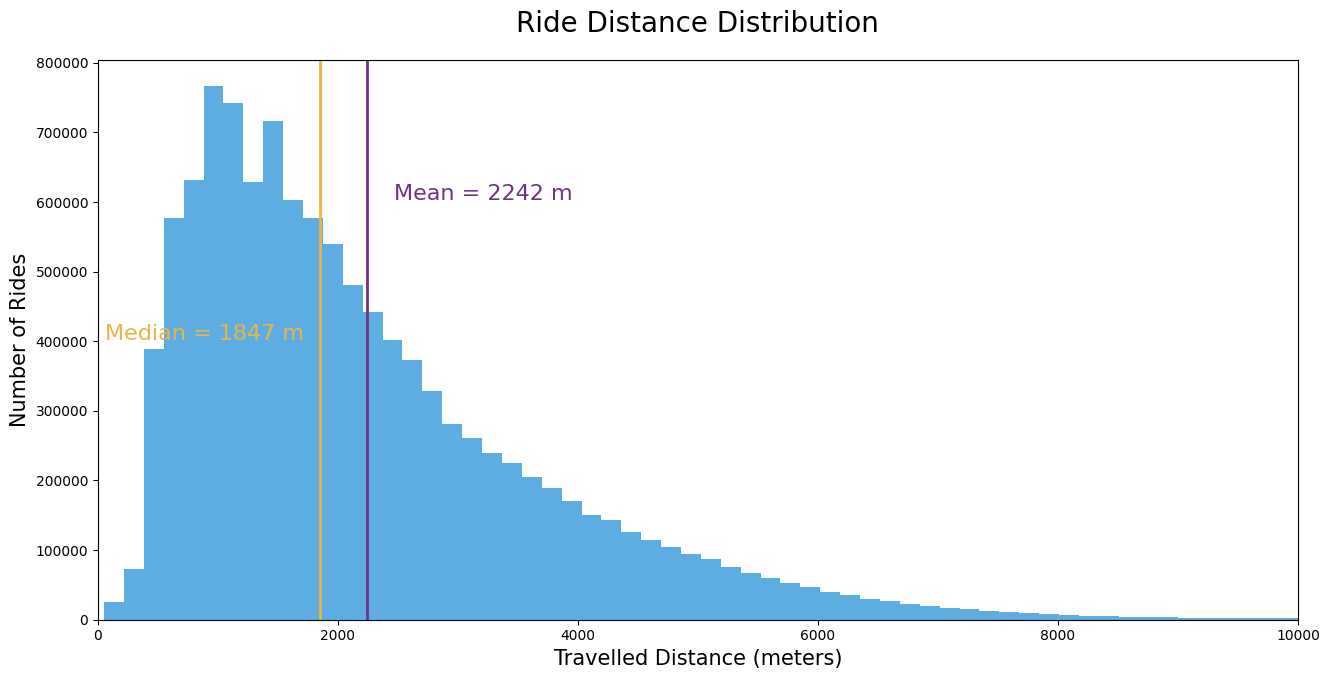

In [19]:
def plot_distance_histogram(dataframe):
  """
  Plot the histogram of distrance traveled by each bike trip according to the reasonable dataframe.
  Parameters
  ----------
  dataframe : dataframe
      Data that has been stored in dataframe pandas format.
  """
  df = dataframe.copy()

  fig = plt.figure(figsize=(15,7))
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

  data = df["distance"]
  plt.hist(data, bins = 60, color = BLUE)


  plt.axvline(df["distance"].mean(), color=MAGENTA, linestyle='-', linewidth=2 )
  plt.axvline(df["distance"].median(), color=YELLOW, linestyle='-', linewidth=2 )

  min_ylim, max_ylim = plt.ylim()

  plt.text(df["distance"].median()*0.03, max_ylim*0.5, 'Median = {:.0f} m'.format(df["distance"].median()), color = YELLOW, fontsize= 16)
  plt.text(df["distance"].mean()*1.1, max_ylim*0.75, 'Mean = {:.0f} m'.format(df["distance"].mean()), color = MAGENTA,  fontsize= 16)

  ax.set_xlim([0,10000])

  # Labeling Axes
  ax.set_title('Ride Distance Distribution', fontdict={"fontsize":20}, pad = 20)
  plt.xlabel("Travelled Distance (meters)", fontsize= 15, x = 0.5)
  plt.ylabel("Number of Rides", fontsize= 15)
  plt.savefig('Ride Distance Distribution.png')
  plt.show()

plot_distance_histogram(all_dataframe)

The city bike system has experienced substantial growth since 2016; nevertheless, the usage patterns of city bikes have remained relatively consistent. Analyzing individual trips over the five years (2016-2020) reveals an average ride duration of approximately 13 minutes and an average traveled distance of around 2242 meters (1.4 miles). Due to the right-skewed distribution of the data, the averages are slightly influenced, with the majority of trips lasting between 4 to 8 minutes and covering a distance of approximately 1700 meters (about 1 mile).

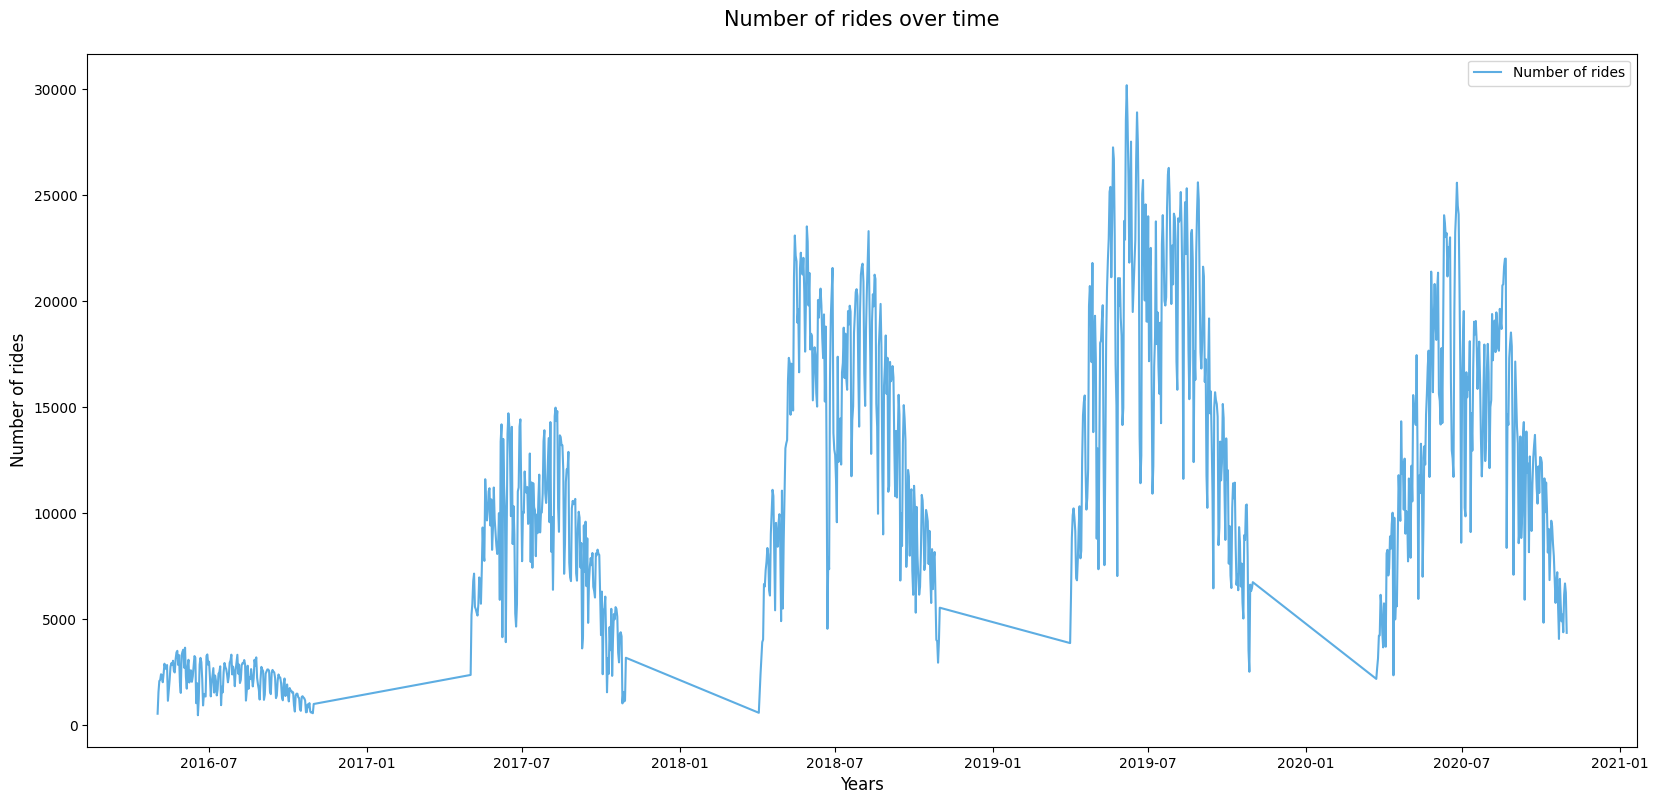

In [20]:
def plot_trips_by_year(dataframe):
  """
  Plot the line chart of the number of trip during 2016-2020 according to the reasonable dataframe.
  Parameters
  ----------
  dataframe : dataframe
      Data that has been stored in dataframe pandas format.
  """
  # Data
  df = dataframe.copy()
  df_over_time = df.groupby(df['departure'].dt.date).size().reset_index(name='count')

  # Figure
  fig, ax = plt.subplots(figsize=(20,9))
  plt.plot(df_over_time["departure"], df_over_time["count"], color= BLUE)

  # Labels
  ax.set_title("Number of rides over time", fontsize= 15, pad= 20)
  ax.set_ylabel("Number of rides", fontsize=12)
  ax.set_xlabel("Years", fontsize=12)

  # Legend
  plt.legend(["Number of rides"])
  plt.savefig('Number of rides Distribution.png')
  plt.show()

plot_trips_by_year(all_dataframe)

Displayed is the count of daily bicycle trips since the inception of the City bike system. The data illustrates a significant correlation between expanding the network coverage and an increase in the number of trips taken by residents. Notably, 2020 marked the initial decline in bike usage. Various factors could account for this decrease, including the impact of the COVID-19 pandemic or the possibility that the city bike network has reached the conclusion of its growth phase.

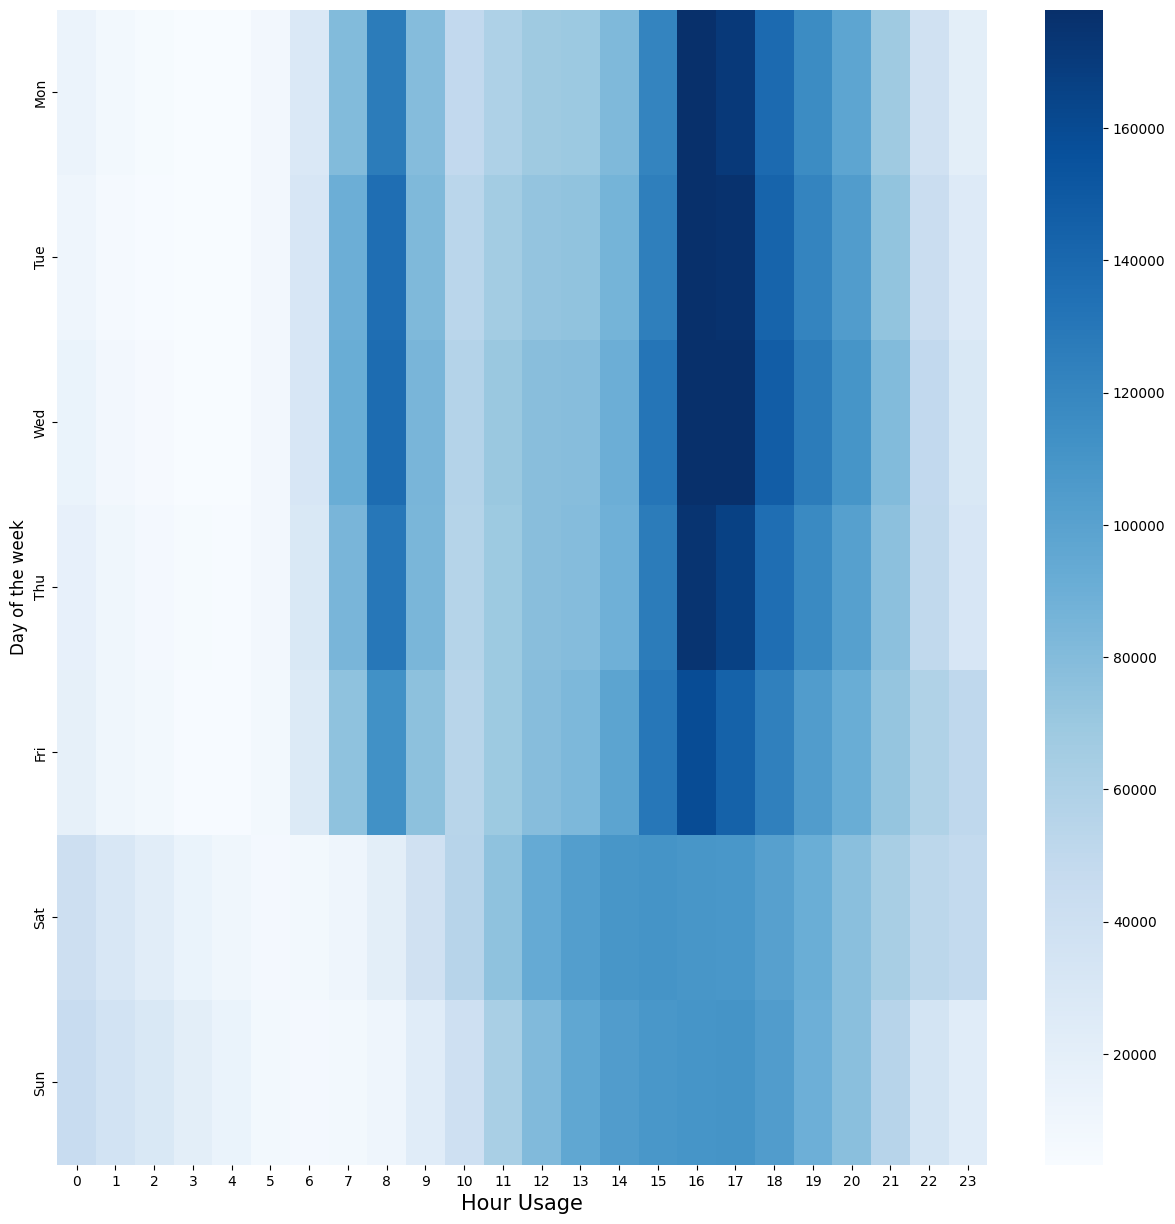

In [21]:
def plot_each_day_heatmap(dataframe):
  """
  Plot the heatmap of hourly usage according to the reasonable dataframe.
  Parameters
  ----------
  dataframe : dataframe
      Data that has been stored in dataframe pandas format.
  """
  weekdays = ["Mon", "Tue","Wed", "Thu", "Fri", "Sat", "Sun"]

  # Data
  df = dataframe.copy()
  df["hour"] = pd.DatetimeIndex(df['departure']).hour
  df["weekday"] = pd.DatetimeIndex(df['departure']).weekday
  daily_activity = df.groupby(by=['weekday','hour']).count()['departure_name'].unstack()

  # Figure
  fig, ax = plt.subplots(figsize=(15,15))
  sns.heatmap(daily_activity, robust=True, cmap="Blues", yticklabels=weekdays) # "YlOrBr

  # Labeling Axes
  plt.xlabel("Time of the day (Hours)", fontsize= 12, x = 0.5)
  plt.ylabel("Day of the week", fontsize= 12)
  ax.set_xlabel("Hour Usage", fontsize=15)
  plt.savefig('Hours Usage Heat Map.png')


plot_each_day_heatmap(all_dataframe)

During weekends, usage patterns diverge. It appears that Helsinki residents opt for a later start to their weekends, with peak activity observed between 3:00 PM and 5:00 PM. Notably, city bike usage peaks around midnight on weekends, suggesting a potential substitution for other public transportation options that might be unavailable during those hours.

<Figure size 4000x4000 with 0 Axes>

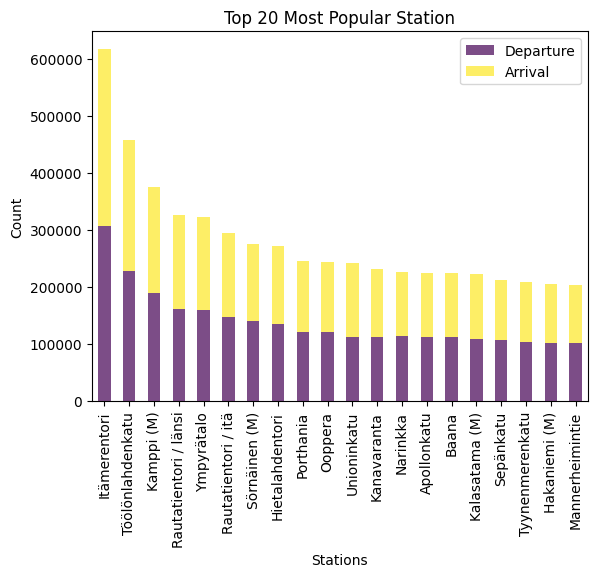

In [22]:
def plot_popular_stantions(dataframe):
  """
  Plot the most popular stations during 2016-2020 according to the reasonable dataframe.
  Parameters
  ----------
  dataframe : dataframe
      Data that has been stored in dataframe pandas format.
  """
  # Data
  df = dataframe.copy()

  # Aggregate the data using value_counts
  counts_departure = df['departure_name'].value_counts()
  counts_arrival = df['return_name'].value_counts()

  # Combine counts into a new DataFrame
  counts_df = pd.DataFrame({'Departure': counts_departure, 'Arrival': counts_arrival})

  # Sort the DataFrame by the sum of counts and select the top 20
  top_counts_df = counts_df.sum(axis=1).sort_values(ascending=False).head(20)
  top_df = counts_df.loc[top_counts_df.index]

  # Figure
  fig = plt.figure(figsize=(40,40))

  # Plotting stacked histogram using Matplotlib
  top_df.plot(kind='bar', stacked=True, alpha=0.7, colormap='viridis')

  # Adding labels and title
  plt.xlabel('Stations')
  plt.ylabel('Count')
  plt.title('Top 20 Most Popular Station')
  plt.savefig('Top 20 Most Popular Station.png')
  # Display the plot
  plt.show()

plot_popular_stantions(all_dataframe)

Not all bike stations are equally popular. In 2016, Kamppi was the top station, but since 2017, Itämerentori has taken the lead. The surprising popularity of Itämerentori and Töölönlahdenkatu is due to their strategic positions in the expanding bike network, even though they're not in the center of Helsinki. Their importance increased as the network grew northward, shifting the central hub. Bike availability plays a vital role, and Itämerentori and Töölönlahdenkatu are popular for both starting and ending trips, ensuring bikes are consistently available and boosting overall station use.

In [23]:
len(all_dataframe)

11278850

The one problem worth to mention is not all the recorded transportation is free, because some of them exceeded the 30 minutes free pass. In this case, we want to remove all the trips that exceed or equal to 30 minutes, because we are aiming to find the shortest path in less than 30 minutes. By building the graph with all data trips less than 30 minutes, ensure that it would be possible to finish the trip between 2 points in less than 30 minutes.

In [24]:
df = all_dataframe[all_dataframe["duration"]<= 1800]
len(df)

10920525

In [25]:
# Delete the DataFrame to free up memory
# del all_dataframe

# NetworkX Initiation

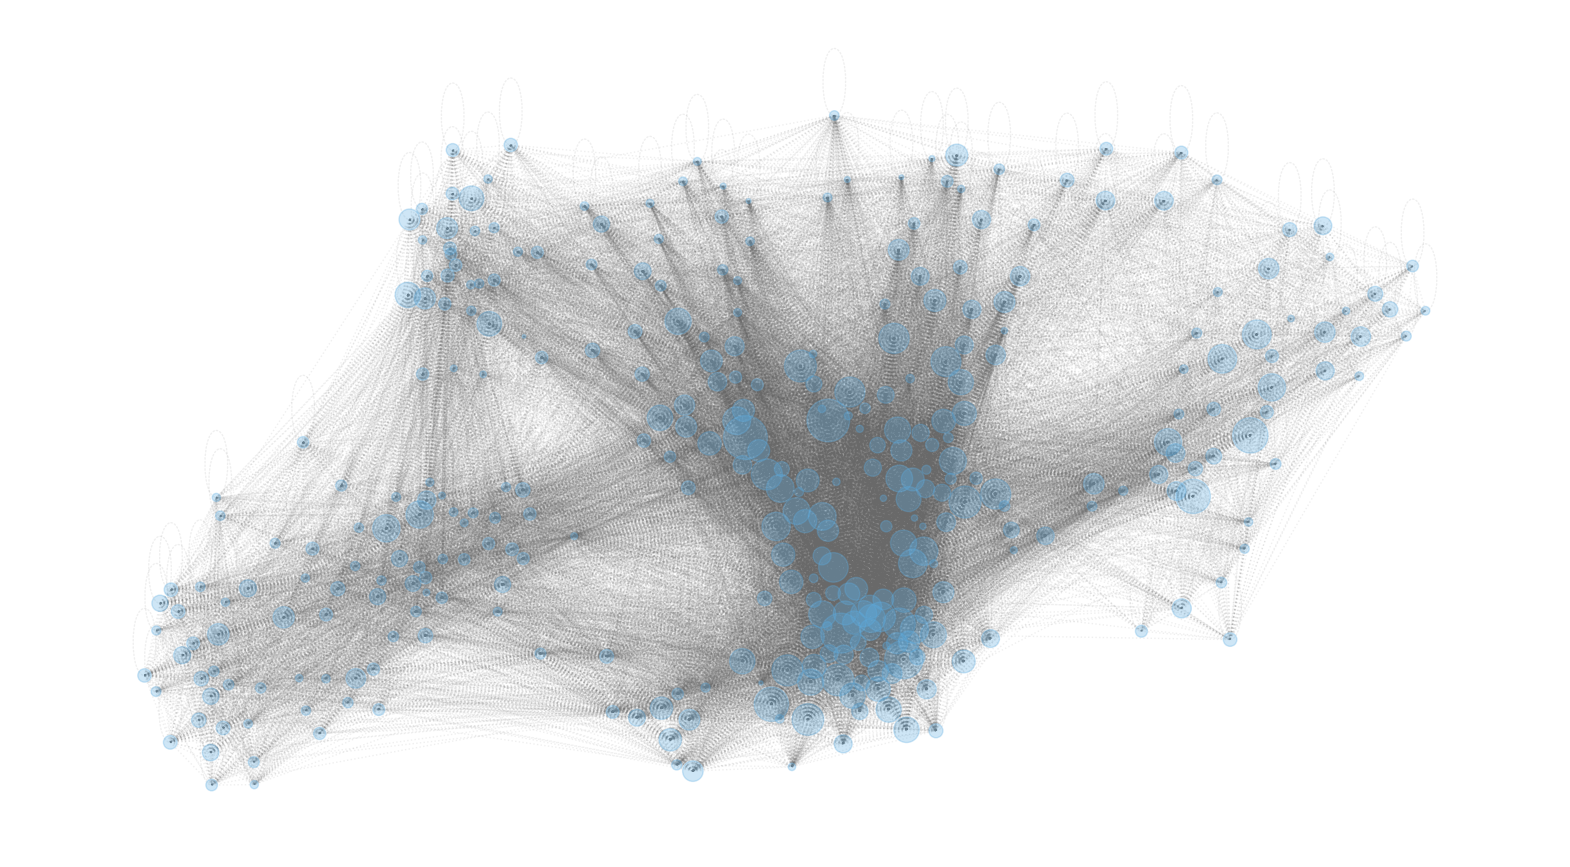

In [26]:
def initate_bike_station_network(dataframe, year = 2020):
  """
  This function plots the City bike network with node sizes illustrating station popularity.

  Parameters
  ----------
  dataframe : dataframe
      Data that has been stored in dataframe pandas format.
  year : int
      The maximum number of year that will considered in the graph calculation.
      default = 2020.

  Returns
  -------
  Graph : graph
      Graph containing nodes and edges generated by NetworkX.
      nodes represent the bike station latitude and longitude position.
      edgess represent the bike station duration and distance.

  """
  # Data
  df = dataframe.copy()
  if year < 2017 :
    print("Error: Division by zero is not allowed.")
    result = None
    return result
  else:
    df = df[df['departure'].dt.year == year]

    # Drop NAN Value
    df.dropna(inplace=True)

    # Define the graphs, use the distance as edge since we would like to find the shortest distance path
    G = nx.Graph()
    G = nx.from_pandas_edgelist(df, 'departure_name', 'return_name', edge_attr=['distance'])

    # Setting figure configuration
    fig, ax = plt.subplots(figsize=(20,11))

    # Add latitude and longitude positions
    stantions  = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
    stantions.set_index('name',inplace=True)
    stantions["pos"] = list(zip(stantions["longitude"].astype(float), stantions["latitude"].astype(float)))
    pos = stantions.to_dict()['pos']

    # Map "pos" atribute to nodes from pos dict
    for node, position in pos.items():
        try:
            G.nodes[node]['pos'] = position
        except KeyError:
            pass

    # Draw the graph with node as blue dot and edge as grey dotted lines
    nx.draw_networkx_nodes(G=G,pos=G.nodes.data('pos'), node_color=BLUE, alpha=0.3, node_size= (df['departure_name'].value_counts()/50).tolist())
    nx.draw_networkx_edges(G=G,pos=G.nodes.data('pos'), edge_color=GREY, style ="dotted", alpha=0.1, arrows=False)
    ax.axis('off')

    # Save the plot as an image file (e.g., PNG, PDF, SVG)
    plt.savefig("network_graph.png")

    return G

G = initate_bike_station_network(df)

# NetworkX Analysis

## Important Stats from Network X

In [27]:
def generate_network_stats(graph, top_n = 10):
  """
  This function prints the basic properties of the city bike network such as number of nodes, number of edges, average degree, network density and triadic closure.
  This functions also generate the top n city bike station with highest degree and betweenness centrality based on the graphs.

  Parameters
  ----------
  graph : graph
      graph that has been generated with networkX.
  top_n : int
      The maximum number of city that will be displayed.
      default = 2020.
  """
  print(graph)
  print('Number of nodes', len(graph.nodes))
  print('Number of edges', len(graph.edges))
  print('Average degree', sum(dict(graph.degree).values()) / len(graph.nodes))

# Hard coded so that you can run without entering any input
generate_network_stats(G)

Graph with 347 nodes and 26913 edges
Number of nodes 347
Number of edges 26913
Average degree 155.11815561959654


## Network X Degree Centrality

In NetworkX, Degree centrality is a simple way to figure out how popular or connected a point is in a network. In our city bike scenario, it tells us how many other bike stations people have ridden to from a particular station. If we look at the graph, we can see that stations in the middle of Helsinki are more popular and have more connections. As you move away from the center, the stations have fewer connections.



In [28]:
def generate_network_degree_centrality(graph, top_n = 10):
  """
  This functions also generate the top n city bike station with highest degree centrality based on the graphs.

  Parameters
  ----------
  graph : graph
      graph that has been generated with networkX.
  top_n : int
      The maximum number of city that will be displayed.
      default = 10.
  """

  degree_dict = dict(graph.degree(graph.nodes()))
  nx.set_node_attributes(graph, degree_dict, 'degree')

  sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
  print("\nTop "+str(top_n)+" nodes (stations) by degree:\n")
  for d in sorted_degree[:top_n]:
      print(d)

# Hard coded so that you can run without entering any input
generate_network_degree_centrality(G)


Top 10 nodes (stations) by degree:

('Haukilahdenkatu', 303)
('Paciuksenkaari', 257)
('Huopalahdentie', 256)
('Munkkiniemen aukio', 255)
('Tilkanvierto', 253)
('Laajalahden aukio', 248)
('Paciuksenkatu', 246)
('Pasilan asema', 243)
('Töölöntulli', 242)
('Saunalahdentie', 242)


## Network X Betweenness Centrality

In NetworkX, Betweenness centrality is like a traffic cop in the network. It looks at how often a point acts as a bridge between other points. It counts how many times the shortest routes between different points pass through it. In the graph, you can see the city bike stations ranked by their betweenness centrality, showing which ones are like key bridges in the network.

In [29]:
def generate_network_betweenness_centrality(graph, top_n = 10):
  """
  This functions also generate the top n city bike station with highest betweenness centrality based on the graphs.

  Parameters
  ----------
  graph : graph
      graph that has been generated with networkX.
  top_n : int
      The maximum number of city that will be displayed.
      default = 10.
  """

  # Compute betweenness centrality
  betweenness_dict = nx.betweenness_centrality(graph)
  sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

  print("\nTop "+str(top_n)+" nodes (stations) by betweenness centrality:\n")
  for b in sorted_betweenness[:top_n]:
      print(b)

# Hard coded so that you can run without entering any input
generate_network_betweenness_centrality(G)


Top 10 nodes (stations) by betweenness centrality:

('Haukilahdenkatu', 0.06908714520533041)
('Lehtisaarentie', 0.009344749491718398)
('Kalasatama (M)', 0.007789453583024854)
('Luoteisväylä', 0.006880588904980379)
('Puistokaari', 0.00662208372040781)
('Paciuksenkaari', 0.006439267278017997)
('Saunalahdentie', 0.006270598565727013)
('Lauttasaaren ostoskeskus', 0.005912914402034423)
('Munkkiniemen aukio', 0.005887068733614538)
('Huopalahdentie', 0.005859709376718192)


## Network X Diameter

In NetworkX, "diameter" is like measuring how far apart the two most distant points are in a network. It's like finding the longest distance between any two places on a map. The diameter of a network tells us how "big" or "spread out" the network is. If the diameter is small, it means most points are relatively close to each other, while a larger diameter suggests that some points are quite far apart in the network.

In [30]:
nx.diameter(G)

3

## Network X Desnity

In NetworkX, "density" is a way to describe how packed or crowded a network is. It's like looking at how many connections or relationships exist among the different points in the network. A high density means there are lots of connections, so it's pretty crowded, like a busy social network. A low density indicates there are fewer connections, so it's more spread out, like a sparsely populated area.

In [31]:
nx.density(G)

0.44831836884276455

## Network X Shortest Path Length

In NetworkX, "shortest path length" is like finding the quickest way to get from one point to another in a network. It's similar to discovering the shortest route between two places on a map. Shortest path length tells us how many steps or connections we need to follow to go from one point to another. It's a measure of efficiency in the network, showing how easily information or influence can travel between different points.

In [32]:
nx.average_shortest_path_length(G)

1.5821825390215056

## Network X Node Connectivity

In NetworkX, "node connectivity" is a way to measure how strong or important a single point, or node, is in a network. It's like assessing the importance of a hub in a wheel; if you remove that hub, the wheel doesn't work well. Node connectivity tells us how many connections need to be broken to isolate a specific node from the rest of the network. A higher node connectivity means that the node is crucial for keeping the network connected and functioning.

In [33]:
#create two simple graphs from our original directed graph
G_simple = nx.Graph(G)
G_simple2 = nx.Graph(G)


nx.node_connectivity(G_simple)

35

## Degree Centrality Distribution Plot

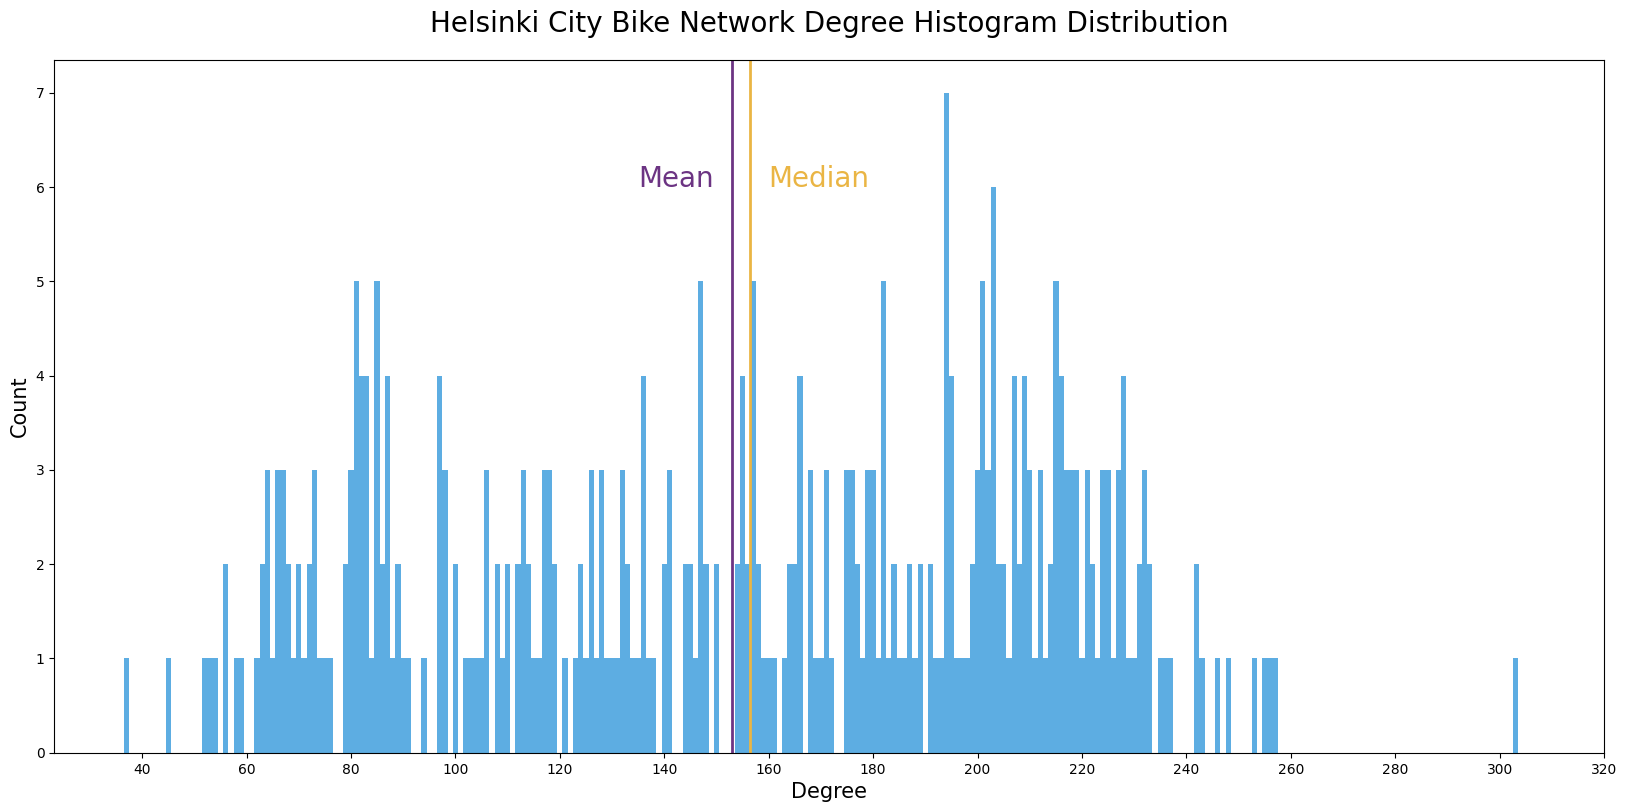

In [34]:
def plot_histogram_centrality_degree_distribution(G):
  """
  Plot histogram centrality degree distribution
  Parameters
  ----------
  graph : graph
      graph that has been generated with networkX.

  """
  # Degree
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())

  # Figure
  fig, ax = plt.subplots(figsize=(20,9))
  plt.bar(deg, cnt, width=1, color=BLUE)
  plt.axvline(x = sum(deg)/len(deg), color=MAGENTA, linestyle='-', linewidth=2) # Degree Mean
  plt.axvline(x = np.median(deg), color=YELLOW, linestyle='-', linewidth=2) # Degree Median

  # Labeling
  # plt.title("Helsinki City Bike Network Degree Histogram Distribution")
  ax.set_title('Helsinki City Bike Network Degree Histogram Distribution', fontdict={"fontsize":20}, pad = 20)
  plt.ylabel("Count", fontsize= 15)
  plt.xlabel("Degree", fontsize= 15)
  plt.text(x=135,y=6, s="Mean", color = MAGENTA, fontsize= 20)
  plt.text(x=160,y=6, s="Median", color = YELLOW, fontsize= 20)
  ax.set_xticks(range(40,340,20))
  # Save the plot as an image file (e.g., PNG, PDF, SVG)
  plt.savefig("Centrality Distribution.png")

  plt.show()

plot_histogram_centrality_degree_distribution(G)

## Degree Centrality Plot

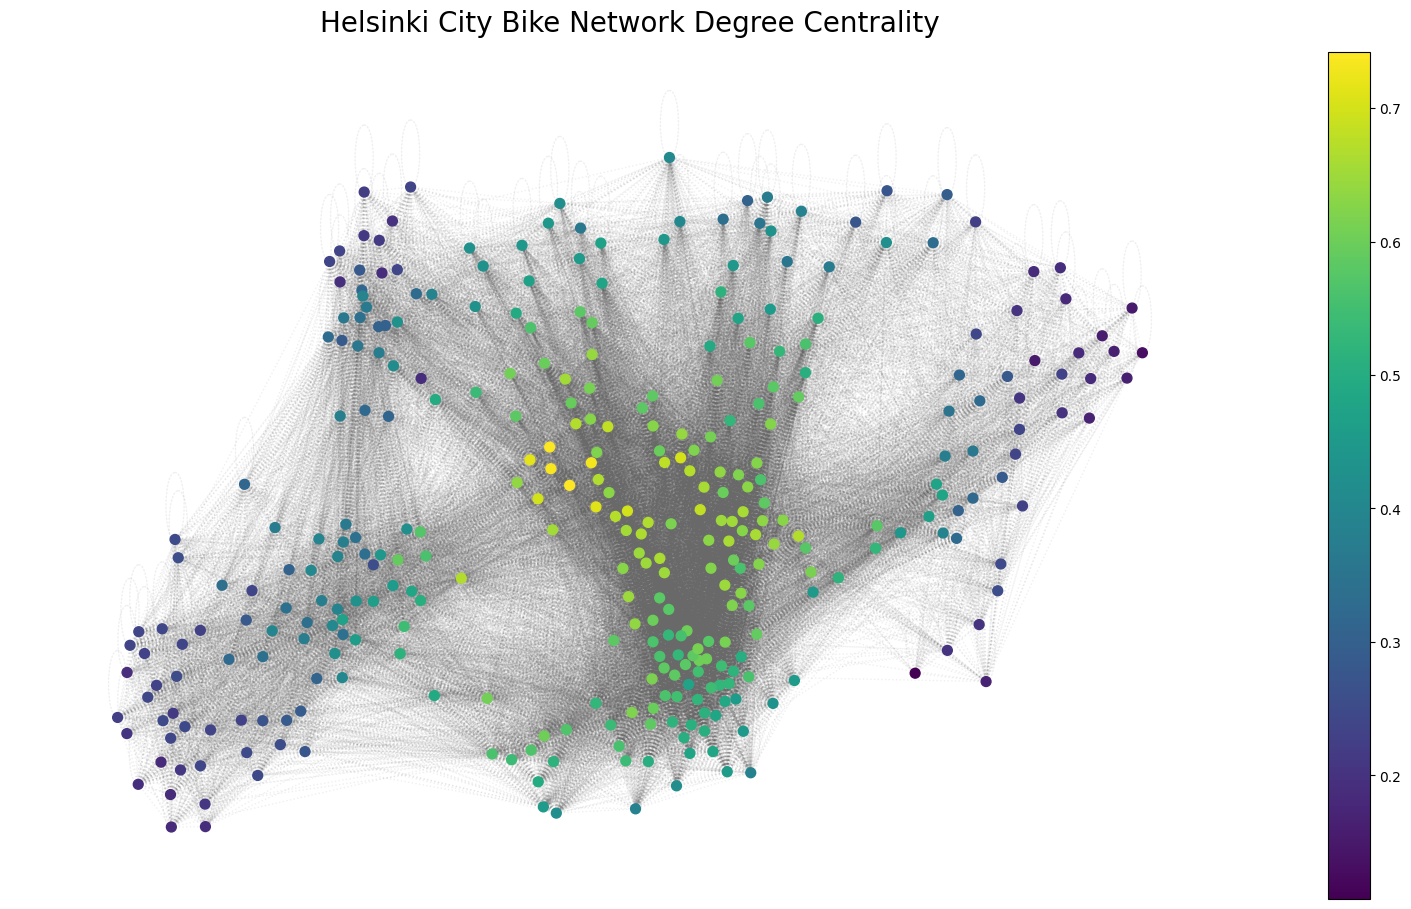

In [35]:
def plot_degree_centrality(G):
  """
  This function plots an interactive City bike network with node degrees, by removing the "Haukilahdenkatu".
  It is because "Haukilahdenkatu" is kinda like outlier since from the histogram plot the degree centrality, it stands at the right side by itself
  Furthermore, I have tried this in the graph and if we include it, then "Haukilahdenkatu" will stay yellow alone.
  On the other hand, we have the variety, if we remove it from the "game".

  Parameters
  ----------
  graph : graph
      graph that has been generated with networkX.

  """
  # Figure
  fig, ax = plt.subplots(figsize=(20,11))

  G.remove_node("Haukilahdenkatu")

  degree = nx.degree_centrality(G)
  node_color = [degree[i] for i in degree.keys()]

  # Color scale
  colors=range(20)
  cmap=plt.cm.viridis
  vmin = min(node_color)
  vmax = max(node_color)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
  sm._A = []
  plt.colorbar(sm)

  # Draw
  nx.draw_networkx_nodes(G=G, pos=G.nodes.data('pos') ,node_color=node_color,cmap="viridis", alpha=1, node_size= 50)
  nx.draw_networkx_edges(G=G, pos=G.nodes.data('pos') ,edge_color=GREY, style ="dotted", alpha=0.1, arrows=False)

  # Labeling Axes
  ax.set_title('Helsinki City Bike Network Degree Centrality', fontdict={"fontsize":20}, pad = 15)
  ax.axis('off')

  # Save the plot as an image file (e.g., PNG, PDF, SVG)
  plt.savefig("Centrality Distribution Map.png")

# Make a copy of the graph
G_copy = G.copy()
plot_degree_centrality(G_copy)

# Nearest Station Estimation

In [36]:
#taken from. https://github.com/gboeing/osmnx
def great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009):

  """
  This functions generate distance between 2 points with given longitude and latitude

  Parameters
  ----------
  lat1 : int
      departure latitude.
  lng1 : int
      departure longitude.
  lat2 : int
      arrival latitude.
  lng2 : int
      arrival longitude.
  earth_radius : int
      earth radius.
      default = 6371009.

  Returns
  -------
  distance: int
      Distance calculated with trigonometry function haversine approach
  """

  phi1 = np.deg2rad(90 - lat1)

  phi2 = np.deg2rad(90 - lat2)

  theta1 = np.deg2rad(lng1)
  theta2 = np.deg2rad(lng2)

  cos = (np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(phi2))
  arc = np.arccos(cos)

  distance = arc * earth_radius

  return distance


def get_nearest_node(G, point):

  """
  This functions generate distance between 2 points with given longitude and latitude

  Parameters
  ----------
  G : Graph
      NetworkX graph that has been generated before.
  point : tuple(int,int)
      contain tuple of (longitude,latitude).

  Returns
  -------
  nearest_node: str
      nearest station toward the given point.
  """

  coords = np.array([[data[0], data[1][0], data[1][1]] for data in G.nodes.data('pos')])
  df = pd.DataFrame(coords, columns=['node', 'x', 'y']).set_index('node')
  df['reference_y'] = point[0]
  df['reference_x'] = point[1]

  distances = great_circle_vec(lat1=df['reference_y'],
                                lng1=df['reference_x'],
                                lat2=df['x'].astype('float'),
                                lng2=df['y'].astype('float'))

  nearest_node = distances.idxmin()

  return nearest_node

# Simple UI with Longitude and Latitude Coordinate

In [37]:
longitude_maxi = max(max(df["departure_longitude"]), max(df["return_longitude"]))
latitude_maxi = max(max(df["departure_latitude"]), max(df["return_latitude"]))
longitude_mini = min(min(df["departure_longitude"]), min(df["return_longitude"]))
latitude_mini = min(min(df["departure_latitude"]), min(df["return_latitude"]))
longitude_median = (longitude_maxi + longitude_mini)//2
latitude_median = (latitude_maxi + latitude_mini)//2

print(longitude_maxi, longitude_mini, latitude_maxi, latitude_mini)

25.10619874297898 24.721367 60.23910894200569 60.147921


In [38]:
departure_latitude_slider = widgets.IntSlider(
            value=193515, # default value
            min=147921,
            max=239108,
            step=1,
            style={'description_width': 'Minimum Calories', 'handle_color': '#16a085'}
        )

departure_longitude_slider = widgets.IntSlider(
            value=913783, # default value
            min=721367,
            max=1106198,
            step=1,
            style={'description_width': 'Maximum Calories', 'handle_color': '#16a085'}
        )

In [39]:
arrival_latitude_slider = widgets.IntSlider(
            value=193515, # default value
            min=147921,
            max=239108,
            step=1,
            style={'description_width': 'Minimum Calories', 'handle_color': '#16a085'}
        )

arrival_longitude_slider = widgets.IntSlider(
            value=913783, # default value
            min=721367,
            max=1106198,
            step=1,
            style={'description_width': 'Maximum Calories', 'handle_color': '#16a085'}
        )

In [40]:
def validate_longitude(longitude_value):
  if longitude_value >= 1000000:
    longitude_value -= 1000000
    longitude = float("25."+str(longitude_value))
  else:
    longitude = float("24."+str(longitude_value))
  return longitude

In [41]:
def print_result_coordinate():
  departure_longitude = validate_longitude(departure_longitude_slider.value)
  arrival_longitude = validate_longitude(arrival_longitude_slider.value)
  departure_latitude = float("60."+str(departure_latitude_slider.value))
  arrival_latitude = float("60."+str(arrival_latitude_slider.value))
  print("Departure Longitude", departure_longitude)
  print("Departure Latitude", departure_latitude)
  print("Arrival Longitude", arrival_longitude)
  print("Arrival Latitude", arrival_latitude)
  departure_point = (departure_longitude, departure_latitude)
  arrival_point = (arrival_longitude, arrival_latitude)

  departure_node = get_nearest_node(G, departure_point)
  arrival_node = get_nearest_node(G, arrival_point)

  print("Departure station:", departure_node)
  print("Arrival station:", arrival_node)

  # Calculate the shortest path based on the Network X Graph
  try:
    route = nx.shortest_path(G, str(departure_node), str(arrival_node))
    print("Shortest Path:")
    print(route)
  except:
    print("Some Error")
    pass

  # Create a subgraph for the shortest path
  H = G.subgraph(route)

  # Initiation graph
  fig, ax = plt.subplots(figsize=(20,11))

  # Draw
  nx.draw_networkx_nodes(G=G, pos=G.nodes.data('pos') ,node_color=BLUE, alpha=1, node_size= 50)
  nx.draw_networkx_nodes(G=H, pos=H.nodes.data('pos') ,node_color=RED, alpha=1, node_size= 100)
  nx.draw_networkx_edges(G=G, pos=G.nodes.data('pos') ,edge_color=GREY, style ="dotted", alpha=0.05, arrows=False)
  nx.draw_networkx_edges(G=H, pos=H.nodes.data('pos') ,edge_color=RED, style ="solid", alpha=1, arrows=False)
  nx.draw_networkx_labels(G=H,pos=H.nodes.data('pos'))

  plt.show()

In [42]:
# button process
button_process = widgets.Button(
                description='Process',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_process_clicked(event):
    with output:
        clear_output(wait=True)
        print_result_coordinate()

button_process.on_click(on_button_process_clicked)

vbox_process = widgets.VBox([button_process, output])

# button clear
button_clear = widgets.Button(
                description='Clear',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clear_clicked(event):
    with output:
        clear_output()

button_clear.on_click(on_button_clear_clicked)

vbox_clear = widgets.VBox([button_clear, output])

In [43]:
text_0 = widgets.HTML(value="<h1>Hello Customer \U0001F603, Pick Your Bike Journey !!! </h1>")
text_0_1 = widgets.HTML(value="<h4>Note since the longitude is around 24.XX to 25.XXz</h4>")
text_0_2 = widgets.HTML(value="<h4>then when longitude is greater or equal to 1000000, it will be converted to 25.XX, but by default it is 24.XX</h4>")
text_1 = widgets.HTML(value="<h2>Departure</h2>")
text_2 = widgets.HTML(value="<h3>Choose the departure point</h3>")
text_2_1 = widgets.HTML(value="<h3>Choose the longitude point(24.XX)</h3>")
text_2_2 = widgets.HTML(value="<h3>Choose the latitude point(60.YY)</h3>")
text_3 = widgets.HTML(value="<h2>Arrival</h2>")
text_4 = widgets.HTML(value="<h2>Choose the arrival point</h2>")
text_4_1 = widgets.HTML(value="<h3>Choose the longitude point(24.XX)</h3>")
text_4_2 = widgets.HTML(value="<h3>Choose the latitude point(60.YY)</h3>")
text_9 = widgets.HTML(value="<h2>Show me the results</h2>")
text_10 = widgets.HTML(value="<h2>Clear the current results</h2>")

vbox_text = widgets.VBox([text_0, text_0_1, text_0_2, text_1, text_2, text_2_1, departure_longitude_slider, text_2_2, departure_latitude_slider, text_3, text_4, text_4_1, arrival_longitude_slider, text_4_2, arrival_latitude_slider, text_9, vbox_process, text_10, vbox_clear])

In [44]:
page = widgets.HBox([vbox_text])
display(page)